In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dailytemp = np.random.randint(15,40,(30,6))
dailyhumidity = np.random.randint(20,80,(30,6))
dailyrain = np.random.randint(0,50,(30,6))
dailytemp


array([[38, 16, 20, 17, 30, 17],
       [36, 39, 38, 17, 24, 39],
       [18, 39, 32, 32, 37, 34],
       [18, 35, 18, 33, 26, 21],
       [34, 38, 29, 26, 22, 15],
       [30, 34, 29, 33, 19, 21],
       [16, 36, 23, 26, 15, 39],
       [25, 33, 35, 16, 17, 28],
       [17, 34, 33, 26, 28, 39],
       [29, 34, 16, 27, 26, 30],
       [25, 26, 31, 33, 24, 33],
       [24, 39, 27, 22, 15, 17],
       [26, 31, 35, 39, 31, 36],
       [16, 17, 25, 27, 28, 28],
       [24, 28, 22, 19, 23, 16],
       [33, 36, 17, 33, 35, 36],
       [37, 32, 19, 39, 36, 20],
       [22, 18, 28, 26, 33, 34],
       [24, 35, 29, 29, 27, 39],
       [35, 16, 16, 36, 24, 26],
       [20, 38, 28, 23, 32, 30],
       [34, 27, 27, 35, 21, 18],
       [21, 32, 24, 19, 33, 37],
       [35, 31, 26, 27, 18, 30],
       [37, 16, 32, 18, 21, 19],
       [20, 23, 26, 35, 34, 25],
       [29, 33, 29, 27, 23, 36],
       [38, 24, 17, 22, 35, 23],
       [25, 35, 32, 24, 27, 34],
       [20, 34, 34, 34, 33, 16]], dtype=int

## plot tempretue as sample

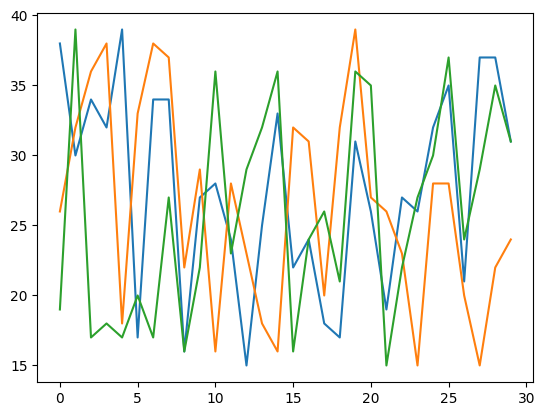

In [110]:
plt.plot(range(30),dailytemp[:,0])
plt.plot(range(30),dailytemp[:,1])
plt.plot(range(30),dailytemp[:,2])
plt.show()

In [5]:
pd.set_option('display.min_rows', 10)
cities = ["Tehran", "Mashhad", "Isfahan", "Tabriz", "Shiraz", "Ahvaz"]

tempdf = pd.DataFrame(dailytemp,columns=cities)
humiditydf = pd.DataFrame(dailyhumidity,columns=cities)
raindf = pd.DataFrame(dailyrain,columns=cities)

df = pd.DataFrame({
    "city" : np.repeat(cities,30),
    "day" : np.tile(np.arange(1, 31), 6)
})

df["Temperature"] = pd.DataFrame([tempdf.loc[day -1 ,city] for city, day in zip(df["city"], df["day"])])
df["Humidity"] = pd.DataFrame([humiditydf.loc[day -1 ,city] for city, day in zip(df["city"], df["day"])])
df["Rainfall"] = pd.DataFrame([raindf.loc[day -1 ,city] for city, day in zip(df["city"], df["day"])])
df

,city,day,Temperature,Humidity,Rainfall
0,Tehran,1,38,20,11
1,Tehran,2,36,28,27
2,Tehran,3,18,35,1
3,Tehran,4,18,33,38
4,Tehran,5,34,40,30
...,...,...,...,...,...
175,Ahvaz,26,25,43,24
176,Ahvaz,27,36,79,14
177,Ahvaz,28,23,79,21
178,Ahvaz,29,34,44,15


In [127]:
mean = df.groupby("city").mean().loc[:, "Temperature":"Rainfall"]
mean

,Temperature,Humidity,Rainfall
city,,,
Ahvaz,25.200000,51.900000,26.066667
Isfahan,25.866667,47.266667,25.466667
Mashhad,26.400000,46.566667,27.300000
Shiraz,26.600000,50.733333,21.166667
Tabriz,26.000000,50.033333,23.466667
Tehran,27.633333,45.600000,24.900000


In [131]:
maxtemp = mean["Temperature"].idxmax()
maxtemp

'Tehran'

In [ ]:
# days = df.filter(lambda x: x["Rainfall"] > 10).groupby("city").count()
days = df[df["Rainfall"] > 10].groupby("city").count()["day"]
days

city
Ahvaz      25
Isfahan    25
Mashhad    27
Shiraz     22
Tabriz     27
Tehran     23
Name: day, dtype: int64

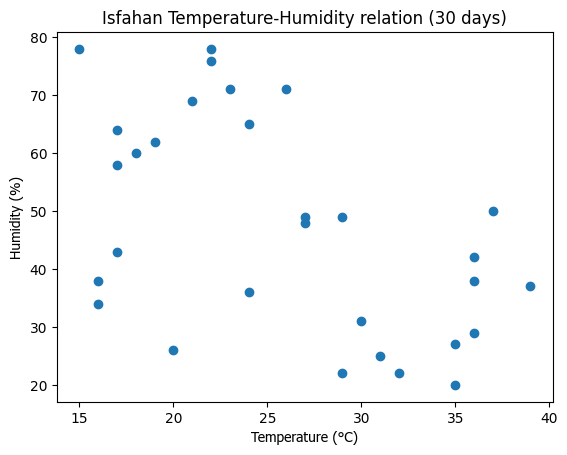

In [ ]:
df_isf = df[df["city"] == "Isfahan"]
plt.scatter(df_isf["Temperature"],df_isf["Humidity"])
plt.title("Isfahan Temperature-Humidity relation (30 days)")
plt.xlabel("Temperature (°C)", fontname="Tahoma")
plt.ylabel("Humidity (%)", fontname="Tahoma")
plt.show()